In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
full_data = pd.read_csv("../../datasets/kc_house_data.csv",index_col=0)
full_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [35]:
from math import sqrt
full_data['sqft_living_sqrt'] = full_data['sqft_living'].map(sqrt)
full_data['sqft_lot_sqrt'] = full_data['sqft_lot'].map(sqrt)
full_data['bedrooms_squared'] = full_data['bedrooms'] ** 2

full_data['floors'] = full_data['floors'].astype(float)
full_data['floors_squared'] = full_data['floors'].map(lambda x: x ** 2)

In [36]:
lst = full_data.columns
sorted(lst)

['bathrooms',
 'bedrooms',
 'bedrooms_squared',
 'condition',
 'date',
 'floors',
 'floors_squared',
 'grade',
 'lat',
 'long',
 'price',
 'sqft_above',
 'sqft_basement',
 'sqft_living',
 'sqft_living15',
 'sqft_living_sqrt',
 'sqft_lot',
 'sqft_lot15',
 'sqft_lot_sqrt',
 'view',
 'waterfront',
 'yr_built',
 'yr_renovated',
 'zipcode']

In [37]:
all_features = ['bathrooms',
                'bedrooms','bedrooms_squared',
                'floors','floors_squared',
                'grade',
                'sqft_above','sqft_basement',
                'sqft_living','sqft_living_sqrt',
                'sqft_lot','condition',
                'view','waterfront',
                'yr_built','yr_renovated',
]

In [40]:
nan_counts = full_data[all_features].isnull().sum()
print(nan_counts)

bathrooms           0
bedrooms            0
bedrooms_squared    0
floors              0
floors_squared      0
grade               0
sqft_above          2
sqft_basement       0
sqft_living         0
sqft_living_sqrt    0
sqft_lot            0
condition           0
view                0
waterfront          0
yr_built            0
yr_renovated        0
dtype: int64


In [41]:
full_data.dropna(axis=0,inplace=True)

In [42]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
full_features = scaler.fit_transform(full_data[all_features].values)
full_features

array([[-1.44751897, -0.39871154, -0.32449134, ..., -0.0871767 ,
        -0.54501342, -0.21013854],
       [ 0.17556427, -0.39871154, -0.32449134, ..., -0.0871767 ,
        -0.68119903,  4.74644823],
       [-1.44751897, -1.47389933, -0.82718541, ..., -0.0871767 ,
        -1.29403427, -0.21013854],
       ...,
       [-1.77213562, -1.47389933, -0.82718541, ..., -0.0871767 ,
         1.29349233, -0.21013854],
       [ 0.50018091, -0.39871154, -0.32449134, ..., -0.0871767 ,
         1.12326032, -0.21013854],
       [-1.77213562, -1.47389933, -0.82718541, ..., -0.0871767 ,
         1.25944593, -0.21013854]], shape=(21611, 16))

In [44]:
#Check if the numpy array full_features has NaN, if so, how many
np.isnan(full_features).sum()

np.int64(0)

In [45]:
#as there are NaN , Lasso will fail, hence use some strategy to remove NaN

In [46]:
# from sklearn.impute import SimpleImputer
# 
# imputer = SimpleImputer(missing_values=np.nan, strategy='median')
# full_features = imputer.fit_transform(full_features)

In [47]:
#For now, i will drop those rows instead of using above imputer


In [48]:
#Observe the target is not standardized
target = full_data['price'].values
l1_penalty =5e4
model = Lasso(alpha=l1_penalty).fit(full_features,target)

In [49]:
model

,alpha,50000.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [50]:
#Do you know that even numpy has built-in boolean selector
np.array(all_features)[model.coef_ != 0] 

array(['grade', 'sqft_living', 'view', 'waterfront', 'yr_built'],
      dtype='<U16')

In [51]:
model.intercept_

np.float64(540085.0265142751)

In [52]:
from sklearn.model_selection import train_test_split

train_validation_set, test_set = train_test_split(full_data,train_size=.9,test_size=.1,random_state=1)
train_set, validation_set = train_test_split(train_validation_set, train_size=.5,test_size=.5,random_state=1)

In [53]:
np.logspace(0,9,21)

array([1.00000000e+00, 2.81838293e+00, 7.94328235e+00, 2.23872114e+01,
       6.30957344e+01, 1.77827941e+02, 5.01187234e+02, 1.41253754e+03,
       3.98107171e+03, 1.12201845e+04, 3.16227766e+04, 8.91250938e+04,
       2.51188643e+05, 7.07945784e+05, 1.99526231e+06, 5.62341325e+06,
       1.58489319e+07, 4.46683592e+07, 1.25892541e+08, 3.54813389e+08,
       1.00000000e+09])

In [55]:
X_train_features = scaler.transform(train_set[all_features].values)
y_train_label = train_set['price'].values

X_validation_features = scaler.transform(validation_set[all_features].values)
y_validation_label = validation_set['price'].values
return_data_list =[]

for l1_penalty in np.logspace(0,9,21):
    model = Lasso(alpha=l1_penalty,max_iter=5000).fit(X_train_features,y_train_label)
    y_predict = model.predict(X_validation_features)
    rss= np.sum(np.square(y_validation_label - y_predict))
    return_data_list.append([rss,l1_penalty,model])

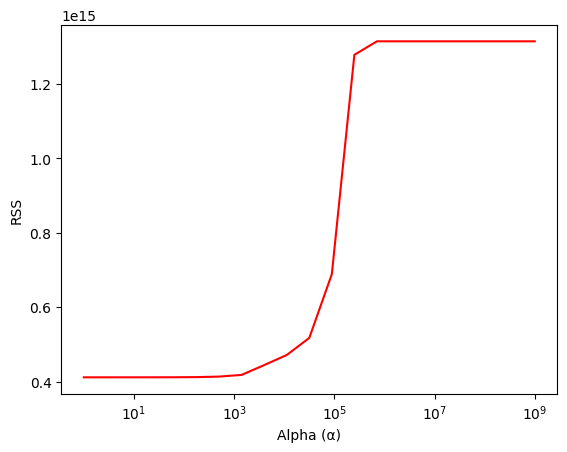

In [57]:


import matplotlib.pyplot as plt
%matplotlib inline
l = np.array(return_data_list)
plt.xscale('log')
plt.xlabel("Alpha (α)")
plt.ylabel("RSS")
plt.plot(l[:, 1].tolist(), l[:, 0].tolist(), color='r')



#Interpretation  
As Alpha (α) increases (moving right on the x-axis), the regularization penalty is stronger.

This typically leads to higher RSS values (moving up on the y-axis), as a stronger penalty forces coefficients toward zero, increasing the model's bias and making the fit to the training data worse.

In [62]:
sorted_data = sorted(return_data_list)
sorted_data[0]

[np.float64(411463888944469.7),
 np.float64(1.0),
 Lasso(alpha=np.float64(1.0), max_iter=5000)]

In [63]:
best_model = sorted_data[0][2]
np.count_nonzero(best_model.coef_)

np.int64(16)

In [64]:
max_nonzeros = 100
l1_penalty_values = np.logspace(3,100,num=21)
l1_penalty_values

array([1.00000000e+003, 7.07945784e+007, 5.01187234e+012, 3.54813389e+017,
       2.51188643e+022, 1.77827941e+027, 1.25892541e+032, 8.91250938e+036,
       6.30957344e+041, 4.46683592e+046, 3.16227766e+051, 2.23872114e+056,
       1.58489319e+061, 1.12201845e+066, 7.94328235e+070, 5.62341325e+075,
       3.98107171e+080, 2.81838293e+085, 1.99526231e+090, 1.41253754e+095,
       1.00000000e+100])

In [66]:
return_data = []

for l1_penalty in l1_penalty_values:
    
    #model = Lasso(alpha=l1_penalty).fit(X_train_features,y_train_label)
    #ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.909e+11, tolerance: 1.314e+11
    #model = cd_fast.enet_coordinate_descent(
    
    #If you get above error, increase the number of iterations first

    model = Lasso(alpha=l1_penalty,max_iter=5000).fit(X_train_features,y_train_label)
    y_predict = model.predict(X_validation_features)
    rss=np.sum(np.square(y_validation_label - y_predict))
    num_nonzero = np.count_nonzero(model.coef_)
    return_data.append([l1_penalty,num_nonzero])

In [68]:
return_data

[[np.float64(1000.0), np.int64(14)],
 [np.float64(70794578.43841374), np.int64(0)],
 [np.float64(5011872336272.715), np.int64(0)],
 [np.float64(3.548133892335731e+17), np.int64(0)],
 [np.float64(2.511886431509572e+22), np.int64(0)],
 [np.float64(1.7782794100389227e+27), np.int64(0)],
 [np.float64(1.2589254117941508e+32), np.int64(0)],
 [np.float64(8.912509381337368e+36), np.int64(0)],
 [np.float64(6.3095734448018915e+41), np.int64(0)],
 [np.float64(4.4668359215096164e+46), np.int64(0)],
 [np.float64(3.1622776601683795e+51), np.int64(0)],
 [np.float64(2.23872113856831e+56), np.int64(0)],
 [np.float64(1.584893192461098e+61), np.int64(0)],
 [np.float64(1.122018454301956e+66), np.int64(0)],
 [np.float64(7.943282347242659e+70), np.int64(0)],
 [np.float64(5.623413251903491e+75), np.int64(0)],
 [np.float64(3.98107170553492e+80), np.int64(0)],
 [np.float64(2.81838293126438e+85), np.int64(0)],
 [np.float64(1.9952623149688665e+90), np.int64(0)],
 [np.float64(1.4125375446227264e+95), np.int64(0)]